<a href="https://colab.research.google.com/github/Junaidalam2002/Pneumonia_xray_image_classification/blob/main/x_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:18<00:00, 150MB/s]
100% 2.29G/2.29G [00:18<00:00, 133MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/chest-xray-pneumonia.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('/content/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('/content/chest_xray/val',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('/content/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
cnn_model = cnn.fit(training_set,
                         epochs = 10,
                         validation_data = validation_generator)

Epoch 1/10
163/163 [==============================] - 107s 644ms/step - loss: 0.3342 - accuracy: 0.8537 - val_loss: 0.2491 - val_accuracy: 1.0000
Epoch 2/10
163/163 [==============================] - 104s 637ms/step - loss: 0.2416 - accuracy: 0.8986 - val_loss: 0.5661 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 106s 651ms/step - loss: 0.2094 - accuracy: 0.9199 - val_loss: 0.4159 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 102s 625ms/step - loss: 0.1808 - accuracy: 0.9287 - val_loss: 0.5678 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 103s 629ms/step - loss: 0.1813 - accuracy: 0.9237 - val_loss: 0.2530 - val_accuracy: 0.9375
Epoch 6/10
163/163 [==============================] - 104s 636ms/step - loss: 0.1693 - accuracy: 0.9316 - val_loss: 0.1999 - val_accuracy: 1.0000
Epoch 7/10
163/163 [==============================] - 103s 634ms/step - loss: 0.1550 - accuracy: 0.9392 - val_loss: 0.4308 -

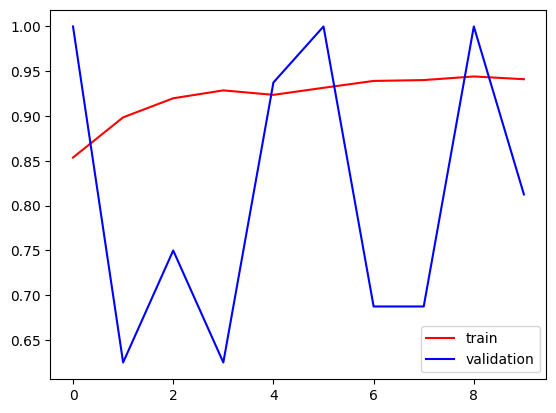

In [8]:
import matplotlib.pyplot as plt

plt.plot(cnn_model.history['accuracy'],color='red',label='train')
plt.plot(cnn_model.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [9]:
test_accu = cnn.evaluate_generator(test_set,steps=624)

<ipython-input-9-bdcfc526b975>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_accu = cnn.evaluate_generator(test_set,steps=624)


In [10]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 85.73718070983887 %


In [20]:
import cv2
test_img = cv2.imread('/content/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg')

In [21]:
test_img = cv2.resize(test_img,(64,64))
test_input = test_img.reshape((1,64,64,3))

In [22]:
cnn.predict(test_input)

1/1 [==============================] - 0s 28ms/step


array([[0.]], dtype=float32)